![](http://sabtrends.com/wp-content/uploads/2017/05/funding-word-money-100-dollar-bill-currency-ball.jpg)

# More To Come. Stay Tuned. !!
  If there are any suggestions/changes you would like to see in the Kernel please let me know :). Appreciate every ounce of help!

**This notebook will always be a work in progress**. Please leave any comments about further improvements to the notebook! Any feedback or constructive criticism is greatly appreciated!. **If you like it or it helps you , you can upvote and/or leave a comment :).**



## This notebook explores the analysis of indian startup funding and basically gives answer of following questions :-
1.  How does the funding ecosystem change with time ?(Number of funding per month)
2. How much funds does startups generally get in India ?(maximum funding, minimum funding , average funding and number of fundings)
3. Which industries are favored by investors for funding ? (OR) Which type of companies got more easily funding ?
4. Do cities play a major role in funding ? (OR) Which city has maximum startups ?
5. Who is the important investors in the Indian Ecosystem?
6. What are different types of funding for startups ?

In [2]:
!pip install squarify

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns
color = sns.color_palette()
import squarify

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
pd.options.mode.chained_assignment = None
#pd.options.display.max_columns = 999

## Obtaining the data

In [5]:
funding_data = pd.read_csv("/content/startup_funding.csv")
funding_data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


### Column names of the table

In [6]:
funding_data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [7]:
print("Size of data(Rows, Columns)",funding_data.shape)

Size of data(Rows, Columns) (2372, 10)


**Lets see How much data is missing**

In [8]:
# missing data
total = funding_data.isnull().sum().sort_values(ascending = False)
percent = ((funding_data.isnull().sum()/funding_data.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])
missing_data.head()

,Total,Percent %
Remarks,1953,82.335582
SubVertical,936,39.460371
AmountInUSD,847,35.708263
CityLocation,179,7.546374
IndustryVertical,171,7.209106


Deleting "**Remarks**" from table and displaying remaining data

In [9]:
del funding_data["Remarks"]
funding_data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"


Now convert the string **"AmountInUSD" **into numeric

In [10]:
funding_data["AmountInUSD"] = funding_data["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
funding_data["AmountInUSD"] = pd.to_numeric(funding_data["AmountInUSD"])
funding_data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0


## Ques 1:  How does the funding ecosystem change with time ?(Number of funding per month)

<ipython-input-23-5bc78adb2bf9>:2: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ipython-input-23-5bc78adb2bf9>:3: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignmen

Number of funding per month in decreasing order(Top 10)
 yearmonth
201601    104
201602    100
201606     98
201507     98
201508     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: count, dtype: int64
year month  yearmonth
201601    104
201602    100
201606     98
201507     98
201508     98
201510     93
201511     92
201512     89
201509     88
201608     87
201506     86
201603     85
201610     80
201605     79
201604     79
201609     73
201611     72
201612     72
201701     72
201703     71
201704     71
201705     68
201706     65
201607     64
201504     63
201505     61
201503     60
201502     55
201501     53
201702     48
201707     43
201708      5
Name: count, dtype: int64


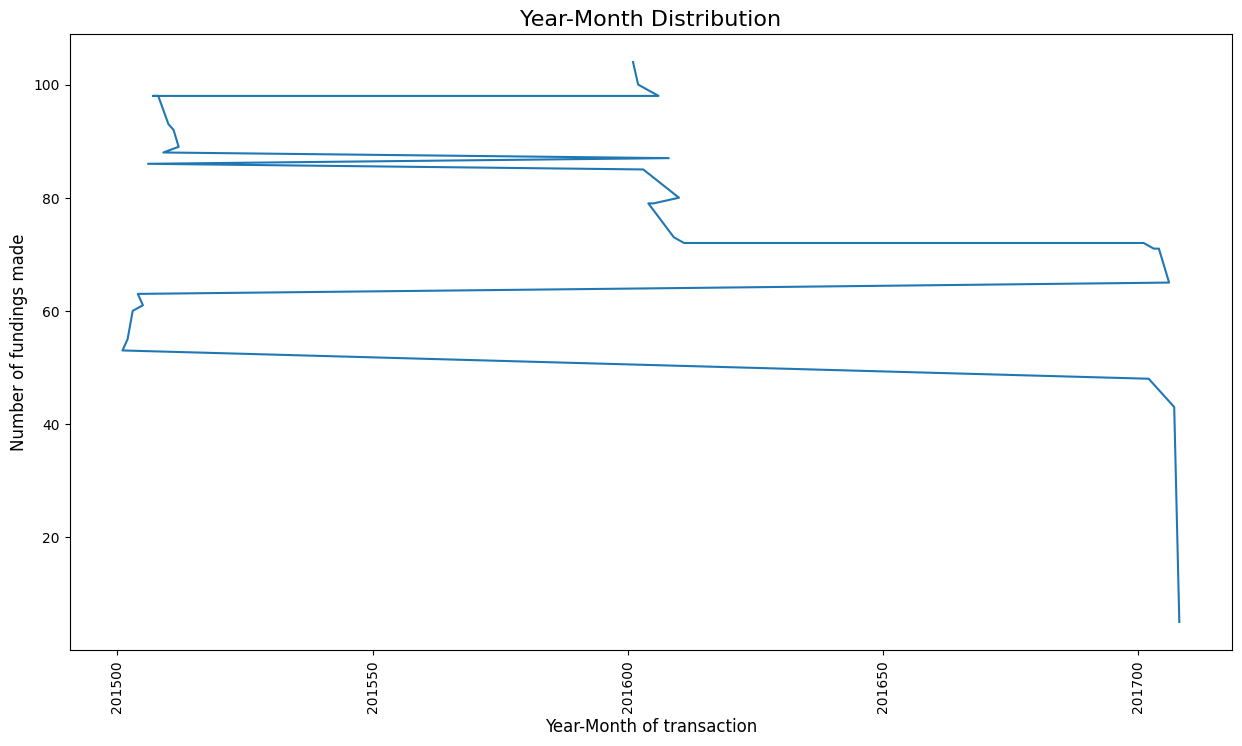

In [23]:
### Some more fixes in the data format. Will try to fix in the input file in next version #
funding_data['Date'][funding_data['Date']=='12/05.2015'] = '12/05/2015'
funding_data['Date'][funding_data['Date']=='13/04.2015'] = '13/04/2015'
funding_data['Date'][funding_data['Date']=='15/01.2015'] = '15/01/2015'
funding_data['Date'][funding_data['Date']=='22/01//2015'] = '22/01/2015'
funding_data["yearmonth"] = (pd.to_datetime(funding_data['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(funding_data['Date'],format='%d/%m/%Y').dt.month)
temp = funding_data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = funding_data['yearmonth'].value_counts()
print("year month ",year_month)
plt.figure(figsize=(15,8))
year_month_index=year_month.index
year_month_values=year_month.values
#plt.plot(year_month_index,year_month_values)
#sns.barplot(year_month.index, year_month.values, alpha=0.9, color=color[0])
#sns.barplot(year_month_index, year_month_values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

As we can see that startups got more funding in **January 2016**(Total funding in January 2016 are 104). Above visualization shows how funding
varies from one month to another.

## Ques 2 : How much funds does startups generally get in India ?(maximum funding, minimum funding , average funding and number of fundings)


In [12]:
print("Maximum funding to a Startups is : ",funding_data["AmountInUSD"].dropna().sort_values().max())

Maximum funding to a Startups is :  1400000000.0


In [13]:
funding_data[funding_data.AmountInUSD == 1400000000.0]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
158,158,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
294,294,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703


In [14]:
funding_data[funding_data.StartupName == 'Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
158,158,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
821,821,30/8/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
1787,1787,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2218,2218,13/03/2015,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,NaN,201503
2276,2276,05/02/2015,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,NaN,201502


As we can see** Paytm** and **Flipkart** got maximum funding of  1400000000 USD. Now lats see least funding.

In [15]:
print("Minimum funding to a Startups is : ",funding_data["AmountInUSD"].dropna().sort_values().min())

Minimum funding to a Startups is :  16000.0


In [16]:
funding_data[funding_data.AmountInUSD == 16000.0]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,yearmonth
2345,2345,19/01/2015,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2346,2346,19/01/2015,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2347,2347,19/01/2015,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2348,2348,19/01/2015,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2349,2349,19/01/2015,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501


Now as we can see **Hostel Dunia, Play your sport, Yo Grad, Enabli and CBS** are least funded Startups i.e, 16000 USD

In [17]:
print("On Average indian startups got funding of : ",funding_data["AmountInUSD"].dropna().sort_values().mean())

On Average indian startups got funding of :  12031073.099016393


On an Average indian startups got funding of :  12031073.099016393

In [18]:
print("Total startups funded : ", len(funding_data["StartupName"].unique()))
print(funding_data["StartupName"].value_counts().head(10))
startupname = funding_data['StartupName'].value_counts().head(20)
plt.figure(figsize=(15,8))
sns.barplot(startupname.index, startupname.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of funding a startup got", fontsize=16)
plt.show()

Total startups funded :  2001
StartupName
Swiggy       7
UrbanClap    6
Medinfi      5
Jugnoo       5
Paytm        5
NoBroker     5
Voonik       4
Byju’s       4
HolaChef     4
Wooplr       4
Name: count, dtype: int64


TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1500x800 with 0 Axes>

As we can see that **Swiggy** got maximum number of fundings(Total funding = 7) and total there are 2001 indian startups funded from January 2015 to August 2017. The above visulization is only for Top 20 startups.

## Ques 3 :  Which industries are favored by investors for funding ? (OR) Which type of companies got more easily funding ?

In [19]:
industry = funding_data['IndustryVertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

IndustryVertical
Consumer Internet    772
Technology           313
eCommerce            171
ECommerce             53
Healthcare            30
Logistics             24
Education             20
Food & Beverage       19
Finance                9
Others                 6
Name: count, dtype: int64


TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1500x800 with 0 Axes>

If we see Above **"Consumer Internet" **got maximum number of funding = 772 followed by technology and E-Commerce.

In [20]:
industry = funding_data['SubVertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

SubVertical
Online Pharmacy                   9
Food Delivery Platform            8
Online lending platform           5
Online Learning Platform          4
ECommerce Marketplace             3
Online Payment Gateway            3
Fitness Mobile App                3
Data Analytics platform           3
Food Ordering Mobile App          2
Healthy Food Delivery platform    2
Name: count, dtype: int64


TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1500x800 with 0 Axes>

In Subcategores, **"Online Phamacy"** got maximim number of fundings.

## Ques 4 : Do cities play a major role in funding ? (OR) Which city has maximum startups ?


In [ ]:
city = funding_data['CityLocation'].value_counts().head(10)
print(city)
plt.figure(figsize=(15,8))
sns.barplot(city.index, city.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

**Distribution of startups across Top different cities**

In [ ]:
plt.figure(figsize=(15,8))
count = funding_data['CityLocation'].value_counts()
squarify.plot(sizes=count.values,label=count.index, value=count.values)
plt.title('Distribution of Startups across Top cities')

We can see **Bangalore** attracts more number of investotrs followed by **Mumbai** and **New** **Delhi**

## Ques 5 : Who is the important investors in the Indian Ecosystem?


In [ ]:
from wordcloud import WordCloud

names = funding_data["InvestorsName"][~pd.isnull(funding_data["InvestorsName"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

In [ ]:
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
funding_data['InvestorsName'][funding_data['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'


In [ ]:
investors = funding_data['InvestorsName'].value_counts().head(10)
print(investors)
plt.figure(figsize=(15,8))
sns.barplot(investors.index, investors.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

**Indian Angel network **and** Ratan tata** funded maximum number of startups followed by **Kalaari Caitals**.

## Ques 6 : What are different types of funding for startups ?

In [ ]:
investment = funding_data['InvestmentType'].value_counts()
print(investment)

In [ ]:
funding_data['InvestmentType'][funding_data['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
funding_data['InvestmentType'][funding_data['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
funding_data['InvestmentType'][funding_data['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'


In [ ]:
investment = funding_data['InvestmentType'].value_counts()
print(investment)
plt.figure(figsize=(15,8))
sns.barplot(investment.index, investment.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()

In [ ]:
temp = funding_data["InvestmentType"].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Types of investment funding with %')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="BorrowerGender")

We can see **Seed Funding** is in **Top** followed by Private Equity.

 # More is coming and if you find useful please upvote the Kernel.